<a href="https://colab.research.google.com/github/aLLUPS/BankNoteAuthentication/blob/feat-temp/BankNote_Authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Authenticate banknotes using ANNs

## Install packages

In [8]:
!pip install datapackage
!pip install --upgrade tensorflow # restart the runtime after upgrading the tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import tensorflow as tf
tf.print(tf. __version__)

2.10.0


## Imports

In [2]:
import datapackage
import pandas as pd
import numpy as np

# modeling the neural network
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Activation
from keras import Model, Sequential
from keras.optimizers import Adam, SGD
from keras.utils import plot_model

# dataset preparation
import sklearn
from sklearn.model_selection import train_test_split

# plotting
import seaborn as seaborn
import matplotlib.pyplot as plt

# load the model
from tensorflow.keras.models import load_model

## Load data

In [3]:
data_url = 'https://datahub.io/machine-learning/banknote-authentication/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data_df = pd.read_csv(resource.descriptor['path'])
        print (data_df)

           V1        V2       V3       V4  Class
0     3.62160   8.66610  -2.8073 -0.44699      1
1     4.54590   8.16740  -2.4586 -1.46210      1
2     3.86600  -2.63830   1.9242  0.10645      1
3     3.45660   9.52280  -4.0112 -3.59440      1
4     0.32924  -4.45520   4.5718 -0.98880      1
...       ...       ...      ...      ...    ...
1367  0.40614   1.34920  -1.4501 -0.55949      2
1368 -1.38870  -4.87730   6.4774  0.34179      2
1369 -3.75030 -13.45860  17.5932 -2.77710      2
1370 -3.56370  -8.38270  12.3930 -1.28230      2
1371 -2.54190  -0.65804   2.6842  1.19520      2

[1372 rows x 5 columns]
           V1        V2       V3       V4  Class
0     3.62160   8.66610  -2.8073 -0.44699      1
1     4.54590   8.16740  -2.4586 -1.46210      1
2     3.86600  -2.63830   1.9242  0.10645      1
3     3.45660   9.52280  -4.0112 -3.59440      1
4     0.32924  -4.45520   4.5718 -0.98880      1
...       ...       ...      ...      ...    ...
1367  0.40614   1.34920  -1.4501 -0.55949   

## Rename the keys

In [5]:
data_df.rename(columns={'V1': 'variance', 'V2': 'skewness', 'V3': 'curtosis', 'V4': 'entropy', 'Class': 'Target'}, inplace=True)
data_df.head(10)

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.80730,-0.44699,1
1,4.54590,8.1674,-2.45860,-1.46210,1
2,3.86600,-2.6383,1.92420,0.10645,1
3,3.45660,9.5228,-4.01120,-3.59440,1
4,0.32924,-4.4552,4.57180,-0.98880,1
5,4.36840,9.6718,-3.96060,-3.16250,1
6,3.59120,3.0129,0.72888,0.56421,1
7,2.09220,-6.8100,8.46360,-0.60216,1
8,3.20320,5.7588,-0.75345,-0.61251,1
9,1.53560,9.1772,-2.27180,-0.73535,1


In [6]:
data_df['Target'] = data_df['Target'].astype('category')
data_df['Target'] = data_df['Target'].cat.codes
data_df['Target'] = data_df['Target'].astype('int')

# Data cleaning and feature engineering

In [7]:
data_df.Target.value_counts()

0    762
1    610
Name: Target, dtype: int64

### Step 01: Prepare the dataset with X inputs and Y labels



In [8]:
X = data_df.drop(columns=['Target'], axis=1).values
print("the shape of X is",X.shape)

Y = data_df[['Target']].values
print("the shape of Y is",Y.shape)

the shape of X is (1372, 4)
the shape of Y is (1372, 1)


### Step 2 - Create test and train dataset

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=34)
print("The training shape = ",X_train.shape, Y_train.shape)
print("The testing shape = ",X_test.shape, Y_test.shape)

The training shape =  (960, 4) (960, 1)
The testing shape =  (412, 4) (412, 1)


In [12]:
x_input_dim = X_train.shape[1]
x_input_dim

4

### Step 03 - Design the model

In [13]:
# Dense = fully conntected layers

model = Sequential()
model.add(Dense(10, activation = 'relu', input_dim=x_input_dim))
model.add(Dense(5, activation = 'relu'))
# model last layer is the output layer (in this case it should have one neurones)
model.add(Dense(1, activation = 'sigmoid'))

# compile the model 
# if there is a single neurons in the output it is a binary classificaiton or two class classification, the activation has to be softmax or sigmoid, the loss = binary_crossentropy
model.compile(loss = 'binary_crossentropy', optimizer = SGD(learning_rate=0.01), metrics=['accuracy'])

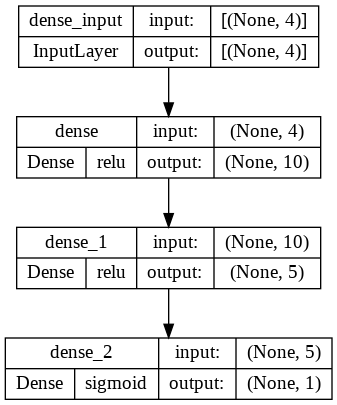

In [15]:
# plot the model shape
plot_model(model, show_shapes=True, show_layer_activations=True, show_layer_names=True)

In [16]:
# model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


### Step 05 - Train the model

In [18]:
r = model.fit(X_train, Y_train, batch_size=60, epochs = 15, validation_split=0.2,)

Epoch 1/15
13/13 [==============================] - 0s 5ms/step - loss: 0.3037 - accuracy: 0.9466 - val_loss: 0.2847 - val_accuracy: 0.9688
Epoch 2/15
13/13 [==============================] - 0s 4ms/step - loss: 0.2903 - accuracy: 0.9544 - val_loss: 0.2711 - val_accuracy: 0.9740
Epoch 3/15
13/13 [==============================] - 0s 4ms/step - loss: 0.2780 - accuracy: 0.9557 - val_loss: 0.2592 - val_accuracy: 0.9740
Epoch 4/15
13/13 [==============================] - 0s 5ms/step - loss: 0.2666 - accuracy: 0.9557 - val_loss: 0.2484 - val_accuracy: 0.9740
Epoch 5/15
13/13 [==============================] - 0s 4ms/step - loss: 0.2559 - accuracy: 0.9583 - val_loss: 0.2383 - val_accuracy: 0.9740
Epoch 6/15
13/13 [==============================] - 0s 5ms/step - loss: 0.2456 - accuracy: 0.9609 - val_loss: 0.2284 - val_accuracy: 0.9740
Epoch 7/15
13/13 [==============================] - 0s 4ms/step - loss: 0.2355 - accuracy: 0.9661 - val_loss: 0.2191 - val_accuracy: 0.9740
Epoch 8/15
13/13 [==

### Step 06 - Save the model as h5 file

In [21]:
model.save('banknote_auth_model.h5')

# Model Training Summary

### Plot the loss

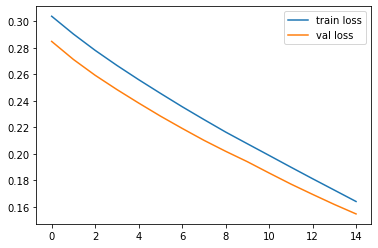

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

### Plot the accuracy

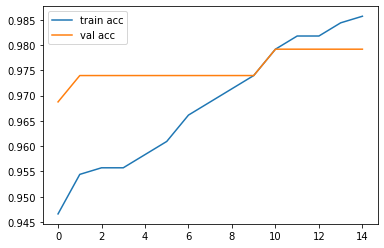

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Testing the model

In [22]:
# load the saved model

model_new = load_model('banknote_auth_model.h5')

In [23]:
# calculate loss and acc on test set
loss, acc = model_new.evaluate(X_test, Y_test, verbose=2)

13/13 - 0s - loss: 0.1822 - accuracy: 0.9854 - 169ms/epoch - 13ms/step
